<a href="https://colab.research.google.com/github/sofial47/senalesysistemas/blob/main/taller2lapalaceipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 3

- * $y[n] = x[n]/3 + 2x[n − 1] − y[n − 1]$ para ver si es Lineal e Invariante en el Tiempo (SLIT), debemos verificar dos propiedades:

Linealidad: Un sistema es lineal si satisface las propiedades de aditividad y homogeneidad (o escalamiento).

Aditividad: La respuesta a la suma de dos entradas es la suma de las respuestas a cada entrada por separado. Es decir, si $\mathsf{H}{x_1[n]} = y_1[n]$ y $\mathsf{H}{x_2[n]} = y_2[n]$, entonces $\mathsf{H}{x_1[n] + x_2[n]} = y_1[n] + y_2[n]$.

Homogeneidad: La respuesta a una entrada escalada por una constante es la respuesta original escalada por la misma constante. Es decir, si $\mathsf{H}{x[n]} = y[n]$, entonces $\mathsf{H}{ax[n]} = ay[n]$ para cualquier constante $a$.

Invariancia en el Tiempo: Un sistema es invariante en el tiempo si un desplazamiento en la entrada provoca el mismo desplazamiento en la salida. Es decir, si $\mathsf{H}\{x[n]\} = y[n]$, entonces $\mathsf{H}\{x[n-n_0]\} = y[n-n_0]$ para cualquier desplazamiento $n_0$.

Se analiza cada propiedad: $y[n] = x[n]/3 + 2x[n − 1] − y[n − 1]$.

Verificando Linealidad:

Consideremos dos entradas $x_1[n]$ y $x_2[n]$ con sus respectivas salidas $y_1[n]$ y $y_2[n]$:
$y_1[n] = x_1[n]/3 + 2x_1[n − 1] − y_1[n − 1]$ $y_2[n] = x_2[n]/3 + 2x_2[n − 1] − y_2[n − 1]$

Ahora, consideremos una entrada combinada $x_3[n] = a x_1[n] + b x_2[n]$, donde $a$ y $b$ son constantes. La salida correspondiente $y_3[n]$ sería:
$y_3[n] = x_3[n]/3 + 2x_3[n − 1] − y_3[n − 1]$ $y_3[n] = (a x_1[n] + b x_2[n])/3 + 2(a x_1[n − 1] + b x_2[n − 1]) − y_3[n − 1]$ $y_3[n] = a x_1[n]/3 + b x_2[n]/3 + 2a x_1[n − 1] + 2b x_2[n − 1] − y_3[n − 1]$ $y_3[n] = a(x_1[n]/3 + 2x_1[n − 1]) + b(x_2[n]/3 + 2x_2[n − 1]) − y_3[n − 1]$

Para que sea lineal, $y_3[n]$ debería ser igual a $a y_1[n] + b y_2[n]$.

$a y_1[n] + b y_2[n] = a (x_1[n]/3 + 2x_1[n − 1] − y_1[n − 1]) + b (x_2[n]/3 + 2x_2[n − 1] − y_2[n − 1])$ $a y_1[n] + b y_2[n] = a x_1[n]/3 + 2a x_1[n − 1] − a y_1[n − 1] + b x_2[n]/3 + 2b x_2[n − 1] − b y_2[n − 1]$ $a y_1[n] + b y_2[n] = a(x_1[n]/3 + 2x_1[n − 1]) + b(x_2[n]/3 + 2x_2[n − 1]) − (a y_1[n − 1] + b y_2[n − 1])$

Comparando $y_3[n]$ y $a y_1[n] + b y_2[n]$, observamos que los resultados no dan lo mismo.

Por lo tanto, el sistema no es lineal en general debido a la dependencia de la salida pasada. De una vez podemos concluir que no es SLIT



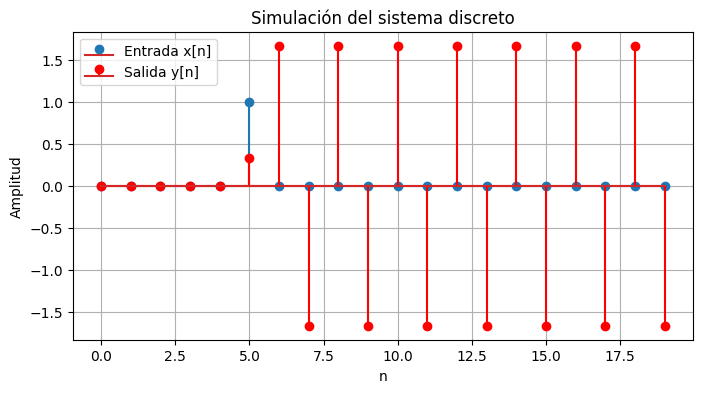

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Definir la función para simular el sistema
def simulate_system(x):
    """
    Simula el sistema y[n] = x[n]/3 + 2x[n − 1] − y[n − 1].

    Args:
        x (np.ndarray): Arreglo numpy que representa la señal de entrada x[n].

    Returns:
        np.ndarray: Arreglo numpy que representa la señal de salida y[n].
    """
    N = len(x)
    y = np.zeros(N) # Inicializamos el arreglo de salida con ceros

    # Aplicamos la ecuación de recurrencia
    for n in range(N):
        # Condición para el primer elemento (n=0) donde no hay y[n-1] ni x[n-1]
        if n == 0:
            y[n] = x[n] / 3
        # Condición para el segundo elemento (n=1) donde no hay y[n-1]
        elif n == 1:
            y[n] = x[n] / 3 + 2 * x[n - 1] - y[n - 1]
        # Para n > 1, aplicamos la ecuación completa
        else:
            y[n] = x[n] / 3 + 2 * x[n - 1] - y[n - 1]

    return y

# Ejemplo de uso:

# Creamos una señal de entrada de ejemplo
# Por ejemplo, un pulso unitario (delta de Dirac)
x_input = np.zeros(20)#20 elementos
x_input[5] = 1 # Pulso en el índice 5; amplitud pulso 1 (pulso unitario)

# Simulamos el sistema con la entrada
y_output = simulate_system(x_input)#y_out: respuesta al impulso del sistema.
#simulate_system recibe el array completo x_input como la señal de entrada x.No solo reemplaza un valor, sino que usa la ecuación para calcular la salida y[n] para cada instante de tiempo n, basándose en el valor de la entrada en el instante actual (x[n]), la entrada en el instante anterior (x[n-1]), y la salida en el instante anterior (y[n-1])

# Graficamos la entrada y la salida
plt.figure(figsize=(8, 4))
plt.stem(x_input, label='Entrada x[n]')
plt.stem(y_output, label='Salida y[n]', linefmt='r-', markerfmt='ro')
plt.title('Simulación del sistema discreto')
plt.xlabel('n')
plt.ylabel('Amplitud')
plt.legend()
plt.grid(True)
plt.show()

# Puedo probar con otras señales de entrada
# Por ejemplo, un escalón unitario
# x_step = np.ones(20)
# y_step = simulate_system(x_step)
# plt.figure(figsize=(8, 4))
# plt.stem(x_step, label='Entrada escalón x[n]', use_line_collection=True)
# plt.stem(y_step, label='Salida y[n]', linefmt='r-', markerfmt='ro', use_line_collection=True)
# plt.title('Simulación del sistema con entrada escalón')
# plt.xlabel('n')
# plt.ylabel('Amplitud')
# plt.legend()
# plt.grid(True)
# plt.show()

* $y[n] = \sum_{k=-\infty}^{n} x^2[k]$ verificamos las dos propiedades: Linealidad e Invariancia en el Tiempo.

**Propiedad de Linealidad:**

Como se sabe, un sistema es lineal si cumple con las 2 propiedades.

*   **Aditividad:**

    Para el sistema dado:
    $y_1[n] = \sum_{k=-\infty}^{n} x_1^2[k]$

    $y_2[n] = \sum_{k=-\infty}^{n} x_2^2[k]$

    Consideremos una entrada $x_3[n] = x_1[n] + x_2[n]$. La salida $y_3[n]$ es:
    $y_3[n] = \sum_{k=-\infty}^{n} (x_1[k] + x_2[k])^2 = \sum_{k=-\infty}^{n} (x_1^2[k] + 2x_1[k]x_2[k] + x_2^2[k])$
    $y_3[n] = \sum_{k=-\infty}^{n} x_1^2[k] + \sum_{k=-\infty}^{n} 2x_1[k]x_2[k] + \sum_{k=-\infty}^{n} x_2^2[k]$

    $y_3[n] = y_1[n] + \sum_{k=-\infty}^{n} 2x_1[k]x_2[k] + y_2[n]$

    Para que se cumpla la aditividad, $y_3[n]$ debería ser igual a $y_1[n] + y_2[n]$. Sin embargo, debido al término cruzado $\sum_{k=-\infty}^{n} 2x_1[k]x_2[k]$, la aditividad no se cumple en general. El sistema **no es Lineal**, lo que es suficiente para concluir que **no es (SLIT)**.

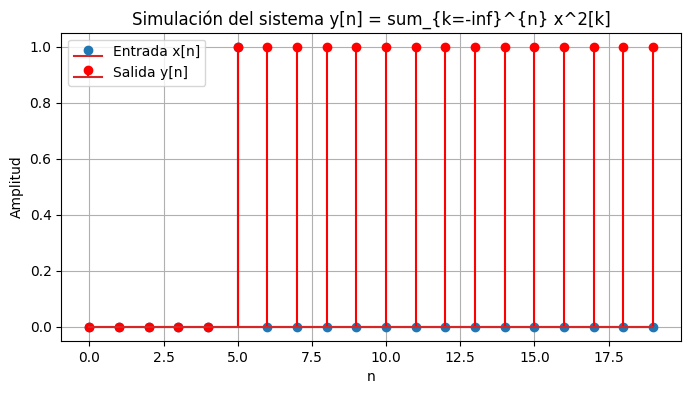

In [3]:
#import numpy as np
#import matplotlib.pyplot as plt

# Definir la función para simular el sistema y[n] = sum_{k=-inf}^{n} x^2[k]
def simulate_cumulative_square_system(x):
    """
    Simula el sistema y[n] = sum_{k=-inf}^{n} x^2[k].

    Args:
        x (np.ndarray): Arreglo numpy que representa la señal de entrada x[n].

    Returns:
        np.ndarray: Arreglo numpy que representa la señal de salida y[n].
    """
    N = len(x)
    y = np.zeros(N) # Inicializamos el arreglo de salida con ceros

    # Aplicamos la ecuación de recurrencia
    # La sumatoria desde -inf hasta n se puede calcular acumulando los cuadrados
    # de los elementos de la entrada hasta el instante actual n.
    # Aquí asumimos que la señal x[n] es 0 para n < 0, lo cual es común en sistemas causales.
    cumulative_sum_of_squares = 0
    for n in range(N):
        cumulative_sum_of_squares += x[n]**2#acomulamos el cuadrado de cada valor de la señal de entrada x[n] a medida que el bucle itera desde el primer elemento (n=0) hasta el último.
        y[n] = cumulative_sum_of_squares
        #Por ejemplo, si tu entrada x fuera [1, 2, 3]:
        #Para n=0: cumulative_sum_of_squares es 0. Se le suma x[0]**2 (que es 1**2 = 1).
        #cumulative_sum_of_squares ahora es 1. y[0] se asigna a 1. Para n=1: cumulative_sum_of_squares es 1. Se le suma x[1]**2 (que es 2**2 = 4).
        #cumulative_sum_of_squares ahora es 1 + 4 = 5. y[1] se asigna a 5.
        #Para n=2: cumulative_sum_of_squares es 5. Se le suma x[2]**2 (que es 3**2 = 9).
        #cumulative_sum_of_squares ahora es 5 + 9 = 14. y[2] se asigna a 14.
        #La salida y sería [1, 5, 14]. Cada valor en y[n] es la suma acumulada hasta ese punto.

    return y

# Ejemplo de uso:

# Creamos una señal de entrada de ejemplo
# Por ejemplo, un pulso unitario
x_input_2 = np.zeros(20)
x_input_2[5] = 1 # Pulso en el índice 5 con amplitud 1

# Simulamos el sistema con la entrada
y_output_2 = simulate_cumulative_square_system(x_input_2)

# Graficamos la entrada y la salida
plt.figure(figsize=(8, 4))
plt.stem(x_input_2, label='Entrada x[n]')
plt.stem(y_output_2, label='Salida y[n]', linefmt='r-', markerfmt='ro')
plt.title('Simulación del sistema y[n] = sum_{k=-inf}^{n} x^2[k]')
plt.xlabel('n')
plt.ylabel('Amplitud')
plt.legend()
plt.grid(True)
plt.show()

# Otro ejemplo de uso: un escalón unitario
# x_step_2 = np.ones(20)
# y_step_2 = simulate_cumulative_square_system(x_step_2)
# plt.figure(figsize=(8, 4))
# plt.stem(x_step_2, label='Entrada escalón x[n]')
# plt.stem(y_step_2, label='Salida y[n]', linefmt='r-', markerfmt='ro')
# plt.title('Simulación del sistema con entrada escalón')
# plt.xlabel('n')
# plt.ylabel('Amplitud')
# plt.legend()
# plt.grid(True)
# plt.show()

* $y[n] = \text{mediana}(x[n])$ con una ventana de tamaño 3 es un sistema Lineal e Invariante en el Tiempo (SLIT)

La operación de mediana sobre una ventana de tamaño 3 significa que la salida en el instante de tiempo $n$, $y[n]$, es la mediana de las muestras de entrada $x[n-1]$, $x[n]$ y $x[n+1]$.

**Linealidad:**

*   **Aditividad:** Si la entrada es $x_1[n] + x_2[n]$, la salida debe ser $y_1[n] + y_2[n]$, donde $y_1[n]$ es la salida para $x_1[n]$ y $y_2[n]$ es la salida para $x_2[n]$.

    Para el sistema de mediana:
    $y_1[n] = \text{mediana}(x_1[n-1], x_1[n], x_1[n+1])$
    $y_2[n] = \text{mediana}(x_2[n-1], x_2[n], x_2[n+1])$

    Consideremos la entrada combinada $x_3[n] = x_1[n] + x_2[n]$. La salida es:
    $y_3[n] = \text{mediana}(x_3[n-1], x_3[n], x_3[n+1]) = \text{mediana}(x_1[n-1] + x_2[n-1], x_1[n] + x_2[n], x_1[n+1] + x_2[n+1])$

    En general, la mediana de una suma no es igual a la suma de las medianas:
    $\text{mediana}(a_1+b_1, a_2+b_2, a_3+b_3) \neq \text{mediana}(a_1, a_2, a_3) + \text{mediana}(b_1, b_2, b_3)$.

    Por ejemplo, consideremos $x_1 = [0, 0, 1, 0, 0]$ y $x_2 = [0, 1, 0, 0, 0]$.
    Para $x_1$, $y_1[2] = \text{mediana}(x_1[1], x_1[2], x_1[3]) = \text{mediana}(0, 1, 0) = 0$.
    Para $x_2$, $y_2[2] = \text{mediana}(x_2[1], x_2[2], x_2[3]) = \text{mediana}(1, 0, 0) = 0$.
    Entonces, $y_1[2] + y_2[2] = 0 + 0 = 0$.

    Ahora consideremos $x_3 = x_1 + x_2 = [0, 1, 1, 0, 0]$.
    $y_3[2] = \text{mediana}(x_3[1], x_3[2], x_3[3]) = \text{mediana}(1, 1, 0) = 1$.

    Como $y_3[2] \neq y_1[2] + y_2[2]$, el sistema no satisface la aditividad y, por lo tanto, **no es lineal**.

Dado que el sistema no es lineal, no puede ser un sistema Lineal e Invariante en el Tiempo (SLIT).

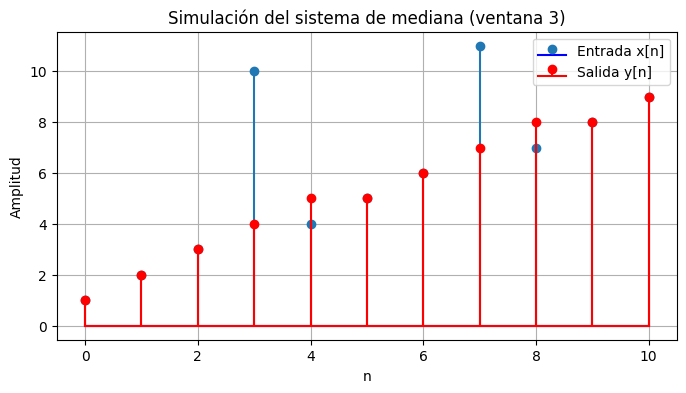

In [4]:
#import numpy as np
#import matplotlib.pyplot as plt

# Definir la función para simular el sistema y[n] = median(x[n]) con ventana de tamaño 3
def simulate_median_filter(x, window_size=3):
    """
    Simula el sistema y[n] = median(x[n]) con una ventana de tamaño especificado.

    Args:
        x (np.ndarray): Arreglo numpy que representa la señal de entrada x[n].
        window_size (int): Tamaño de la ventana para el cálculo de la mediana.
                           Debe ser un número impar.

    Returns:
        np.ndarray: Arreglo numpy que representa la señal de salida y[n].
    """
    if window_size % 2 == 0:
        raise ValueError("El tamaño de la ventana debe ser un número impar.")

    N = len(x)
    y = np.zeros(N) # Inicializamos el arreglo de salida con ceros
    pad_width = window_size // 2 # Relleno para manejar los bordes; Si window_size fuera 5: pad_width = 5 // 2 = 2. Se añadirían 2 muestras de relleno al principio y 2 al final. pad_width: se utiliza posteriormente con la función np.pad() para añadir el relleno a la señal de entrada antes de aplicar el bucle que calcula la mediana para cada punto. El modo de relleno 'edge' que se usa en el código repite el primer y último valor de la señal original para el relleno.

    # Rellenar la señal de entrada para manejar los bordes
    # Usamos 'edge' para repetir los valores de los bordes
    x_padded = np.pad(x, pad_width, mode='edge')

    # Aplicamos el filtro de mediana
    for n in range(N):
        # La ventana se centra en x[n] en la señal original.
        # En la señal rellenada, esto corresponde a x_padded[n + pad_width].
        # La ventana va desde n + pad_width - pad_width hasta n + pad_width + pad_width
        # es decir, desde n hasta n + window_size - 1 en la señal rellenada.
        window = x_padded[n : n + window_size]
        y[n] = np.median(window)#lcula la mediana de los valores dentro de la window actual y asigna este valor a la posición n del arreglo de salida y.

    return y

# Ejemplo de uso:

# Creamos una señal de entrada de ejemplo
# Por ejemplo, una señal con ruido
x_input_3 = np.array([1, 2, 3, 10, 4, 5, 6, 11, 7, 8, 9])#Con una ventana de tamaño 3 y mode='edge', la señal de entrada rellenada x_padded sería: [1, 1, 2, 3, 10, 4, 5, 6, 11, 7, 8, 9, 9]

# Simulamos el sistema con la entrada (ventana de tamaño 3)
y_output_3 = simulate_median_filter(x_input_3, window_size=3)

# Graficamos la entrada y la salida
plt.figure(figsize=(8, 4))
plt.stem(x_input_3, label='Entrada x[n]', basefmt='b-')
plt.stem(y_output_3, label='Salida y[n]', linefmt='r-', markerfmt='ro', basefmt='r-')
plt.title('Simulación del sistema de mediana (ventana 3)')
plt.xlabel('n')
plt.ylabel('Amplitud')
plt.legend()
plt.grid(True)
plt.show()

# Otro ejemplo con una señal diferente
# x_input_4 = np.sin(np.linspace(0, 10*np.pi, 50)) + 0.5 * np.random.randn(50)
# y_output_4 = simulate_median_filter(x_input_4, window_size=3)

# plt.figure(figsize=(8, 4))
# plt.plot(x_input_4, label='Entrada x[n] (con ruido)')
# plt.plot(y_output_4, label='Salida y[n] (filtrada con mediana)', color='red')
# plt.title('Simulación del sistema de mediana (ventana 3) con señal sinusoidal ruidosa')
# plt.xlabel('n')
# plt.ylabel('Amplitud')
# plt.legend()
# plt.grid(True)
# plt.show()

 * $y(t) = Ax(t) + B$ es Lineal e Invariante en el Tiempo (SLIT), verificamos 2 propiedades:

**1. Linealidad:**

*   **Aditividad:** Si la entrada es $x_1(t) + x_2(t)$, la salida debe ser $y_1(t) + y_2(t)$, donde $y_1(t)$ es la salida para $x_1(t)$ y $y_2(t)$ es la salida para $x_2(t)$.

    Para el sistema dado:
    $y_1(t) = A x_1(t) + B$
    $y_2(t) = A x_2(t) + B$

    Consideremos una entrada combinada $x_3(t) = x_1(t) + x_2(t)$. La salida $y_3(t)$ es:
    $y_3(t) = A x_3(t) + B = A (x_1(t) + x_2(t)) + B = A x_1(t) + A x_2(t) + B$

    La suma de las salidas individuales es:
    $y_1(t) + y_2(t) = (A x_1(t) + B) + (A x_2(t) + B) = A x_1(t) + A x_2(t) + 2B$

    Para que se cumpla la aditividad, $y_3(t)$ debería ser igual a $y_1(t) + y_2(t)$. Comparando las expresiones, vemos que $A x_1(t) + A x_2(t) + B \neq A x_1(t) + A x_2(t) + 2B$ a menos que $B=0$.

    Por lo tanto, la aditividad no se cumple en general si $B \neq 0$.

El sistema $y(t) = Ax(t) + B$ **no es un sistema Lineal e Invariante en el Tiempo (SLIT)** en general, a menos que $B=0$.

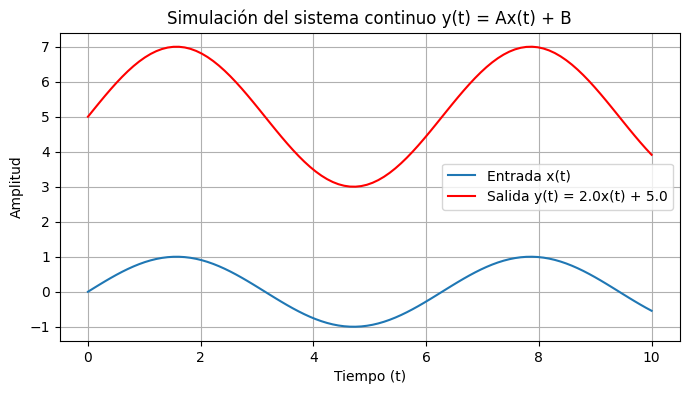

In [5]:
#import numpy as np
#import matplotlib.pyplot as plt

# Definir la función para simular el sistema y(t) = Ax(t) + B
def simulate_continuous_system(x, A, B):
    """
    Simula el sistema y(t) = Ax(t) + B para una señal discreta que
    representa la señal continua.

    Args:
        x (np.ndarray): Arreglo numpy que representa la señal de entrada x(t)
                        (discretizada).
        A (float): Coeficiente A del sistema.
        B (float): Término constante B del sistema.

    Returns:
        np.ndarray: Arreglo numpy que representa la señal de salida y(t)
                    (discretizada).
    """
    # En el dominio discreto, la ecuación se aplica directamente a cada muestra
    y = A * x + B
    return y

# Ejemplo de uso:

# Creamos una señal de entrada de ejemplo (discretizada)
# Por ejemplo, una señal sinusoidal
t = np.linspace(0, 10, 100) # Vector de tiempo
x_input_cont = np.sin(t) # Señal de entrada: sin(t)

# Definimos los parámetros del sistema
A_param = 2.0
B_param = 5.0

# Simulamos el sistema con la entrada y los parámetros
y_output_cont = simulate_continuous_system(x_input_cont, A_param, B_param)

# Graficamos la entrada y la salida
plt.figure(figsize=(8, 4))
plt.plot(t, x_input_cont, label='Entrada x(t)')
plt.plot(t, y_output_cont, label=f'Salida y(t) = {A_param}x(t) + {B_param}', color='red')
plt.title('Simulación del sistema continuo y(t) = Ax(t) + B')
plt.xlabel('Tiempo (t)')
plt.ylabel('Amplitud')
plt.legend()
plt.grid(True)
plt.show()

# Otro ejemplo con una entrada diferente (escalón)
# x_step_cont = np.ones_like(t) # Señal de entrada: escalón unitario
# y_step_cont = simulate_continuous_system(x_step_cont, A_param, B_param)

# plt.figure(figsize=(8, 4))
# plt.plot(t, x_step_cont, label='Entrada escalón x(t)')
# plt.plot(t, y_step_cont, label=f'Salida y(t) = {A_param}x(t) + {B_param}', color='red')
# plt.title('Simulación del sistema continuo con entrada escalón')
# plt.xlabel('Tiempo (t)')
# plt.ylabel('Amplitud')
# plt.legend()
# plt.grid(True)
# plt.show()

#4

In [6]:
%matplotlib inline
from ipywidgets import interact #crear graficos interactivos; herramienta útil para crear controles interactivos (como deslizadores, casillas de verificación, etc.)
#import numpy as np
#import matplotlib.pyplot as plt
from scipy import signal #crear señales prototipo en tiempo discreto

In [7]:
def plot_conv(k, xm, ym, hm):
    plt.figure(figsize=(8, 4))


    plt.subplot(3, 1, 1)
    plt.stem(xm[:, k])
    plt.title('Señal de entrada invertida y desplazada')
    plt.ylabel('Amplitud')
    plt.grid(True)

    plt.subplot(3, 1, 2)
    plt.stem(hm)
    plt.title('Respuesta al impulso')
    plt.ylabel('Amplitud')
    plt.grid(True)

    plt.subplot(3, 1, 3)
    plt.stem(ym[:, k])
    plt.title(f'Producto en el paso k={k}')
    plt.ylabel('Amplitud')
    plt.xlabel('n')
    plt.grid(True)

    plt.tight_layout()

In [8]:
#1
#crear señales
#h = np.array([1,-2,0,1,-2]).reshape(-1,1)#np.r_[np.zeros((5,1)),np.ones((5,1)),np.zeros((5,1))] # se genera un pulso rectangular
#hu = np.array([-1,6,-10,3,1,-10,2,5])
#h = np.diff(hu).reshape(-1,1)#diff=diferencia discreta o derivada discreta de hu; reshape(-1,1): (-1) creara un array de 8 filas y 1 columna, (1) el array resultante debe tener 1 columna
#np.diff(hu) da la diferencia discreta como un array unidimensional (que se comporta como un vector fila en muchas operaciones).
#Luego, .reshape(-1, 1) toma ese array unidimensional y lo reestructura para que tenga varias filas y siempre una columna. El número de filas lo determina automáticamente NumPy (-1) para que coincida con la cantidad de elementos en el array unidimensional original.
#El resultado final, asignado a la variable h, es un vector columna que contiene los valores de la derivada discreta de hu.
#x = np.array([-15,5,-3,0,5,7,-1]).reshape(-1,1)#signal.triang(12).reshape(-1,1) # se genera una señal triangular y se trabaja con arreglos tipo columna

# Signals from user input
h = np.array([1, -2, 0, 1, -2]).reshape(-1, 1)
x = np.array([-15, 5, -3, 0, 5, 7, -1]).reshape(-1, 1)

#funcion convolucion
def convgraf(h,x): #función general para pintar proceso de convolución de forma interactiva
   lx = len(x)
   lh = len(h)
   M = 2*lx+lh # se genera un vector de tamaño completo para visualizar todo el proceso paso a paso; Multiplicar lx por 2 y sumarle lh (2*lx + lh) asegura que las matrices xm y ym sean lo suficientemente grandes para almacenar y mostrar visualmente todos estos desplazamientos y los productos resultantes en cada columna, cubriendo desde antes de que x empiece a solaparse con h hasta después de que termine el solapamiento. Es un tamaño seguro para la visualización en este método particular.
   xm = np.zeros((M,M))#array entradas inicializadas en 0 (Mfilas, Mcolumnas)
   hm = np.r_[np.zeros((lx,1)),h,np.zeros((lx,1))]#np.r=concatena arrays verticalmente; h repuesta impulso (el h que tengo arriba); (lxfilas,1columnas)
   ym = np.zeros((M,M))
   for i in range(M-lx+1):
     #print(i)
     xm[i:i+lx,i] = np.flip(x).reshape(-1)#filp realizar el proceso de reflejo sobre arreglos discretos; flip=(invierte el orden de los elementos) ahora x seria [-1,7,5...]; .reshape(-1): asegura que el arreglo invertido sea un arreglo unidimensional. En este contexto, donde x ya es un vector columna, reshape(-1) lo convierte en un vector fila (un arreglo unidimensional). i:i+lx: Selecciona las filas desde el índice i hasta i + lx - 1,i: Selecciona la columna con índice i.
     #En cada iteración del bucle for, esta línea toma la versión invertida de la señal de entrada x (como un vector fila) y la coloca en una columna específica (i) del arreglo xm, comenzando en la fila i. (se desplaza hacia abajo)
     ym[i,i] = xm[:,i].T.dot(hm) #multiplicacion entre vectores -> producto punto; .T: Esto transpone el vector columna seleccionado en el paso anterior, convirtiéndolo en un vector fila.dot(hm): Esto realiza el producto punto (dot product) entre el vector fila obtenido en el paso anterior (xm[:,i].T) y el vector columna hm.

   return xm, ym, hm

xm, ym, hm = convgraf(h,x)

# The plot_conv function is called by the interact widget in the next cell
# plot_conv(0,xm,ym,hm) # You can uncomment this line to show the initial plot without the slider

/tmp/ipython-input-8-4203216115.py:27: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  ym[i,i] = xm[:,i].T.dot(hm) #multiplicacion entre vectores -> producto punto; .T: Esto transpone el vector columna seleccionado en el paso anterior, convirtiéndolo en un vector fila.dot(hm): Esto realiza el producto punto (dot product) entre el vector fila obtenido en el paso anterior (xm[:,i].T) y el vector columna hm.


In [9]:
#@interact(m=range(xm.shape[0]-len(x)+1)) #define panel tipo selección en el gráfico interactivo
#@interact(k=(0, xm.shape[0]-len(x), 1))#se crea un deslizador, 0 valor minimo. xm.shape[0]-len(x): Es el valor máximo del deslizador. xm.shape[0] es el número de filas en el arreglo xm, y len(x) es la longitud del arreglo x, [0] se utiliza para acceder al 1 elemento d la tupla, tupla(# filas, #columnas). 1: Es el tamaño del paso (step) del deslizador. Significa que el deslizador incrementará o decrementará el valor de k de 1 en 1
#def show_frame(k=0):#nuevo valor de k
 #   plot_conv(k,xm,ym,hm)
#plt.show()
#La línea azul en el subplot de en medio ("Respuesta al impulso") representa la respuesta al impulso h[n]. La línea en el subplot de arriba ("Señal de entrada invertida y desplazada") representa la señal de entrada x[n], pero invertida en el tiempo y desplazada (x[-k] desplazada por n) esto es un cálculo gráfico de la convolución. la gráfica de abajo muestra x[n-k] * h[k] (o la forma equivalente x[k] * h[n-k] dependiendo de cómo se formule exactamente la visualización) para un k fijo, graficado contra n
#k representa los pasos o desplazamientos en el cálculo de la convolución gráfica
#n (en señales y sistemas discretos), representa el índice de tiempo discreto.
#el eje horizontal representa este índice de tiempo n. Al realizar la convolución, estamos calculando el valor de la salida y[n] para cada índice de tiempo n posible. La suma de convolución y[n] = sum(x[k] * h[n-k]) calcula el valor de la salida en un tiempo n específico sumando los productos de las señales en diferentes desplazamientos k.

In [10]:
y_ = np.convolve(x.reshape(-1),h.reshape(-1))#calcula la convolución discreta de dos secuencias unidimensionales.-1 convierte el vector columna en un arreglo unidimensional (una fila simple de datos)
y_

array([-15,  35, -13,  -9,  40, -16,  -9,   7,  -3, -15,   2])

## Definir la respuesta al escalón

### Subtarea:
 Definir la respuesta al escalón `h_epsilon[n]` como un arreglo NumPy, teniendo en cuenta la posición de `n=0`.


**Razonamiento**:
Define la respuesta del escalon `h_epsilon[n]` como un array en NumPy.

In [11]:
# Define the step response h_epsilon[n]
h_epsilon_n = np.array([-1, 6, -10, 3, 1, -10, 2, 5])
# The † is at index 3, so n=0 is at index 3.

## Calcular la respuesta al impulso a partir de la respuesta al escalón

### Subtarea:
Calcular la respuesta al impulso `h[n]` a partir de la respuesta al escalón `h_epsilon[n]` utilizando la relación $h[n] = h_\epsilon[n] - h_\epsilon[n-1]$.


**Razonamiento**:
Se calcula la diferencia discreta de `h_epsilon_n` para encontrar la respuesta al impulso`h_n_from_step`.

In [12]:
h_n_from_step = np.diff(h_epsilon_n)
print("Respuesta al impulso h[n] derivada de la respuesta escalón h_epsilon[n:")
print(h_n_from_step)

Respuesta al impulso h[n] derivada de la respuesta escalón h_epsilon[n:
[  7 -16  13  -2 -11  12   3]


La derivada de una señal discreta, como la respuesta al escalón $h_\epsilon[n]$, se calcula como la diferencia entre muestras consecutivas. La fórmula que usaste es $h[n] = h_\epsilon[n] - h_\epsilon[n-1]$.

Aplicando esto a tu señal $h_\epsilon[n] = \{-1, 6, -10, 3, 1, -10, 2, 5\}$:

El primer valor de $h[n]$ es la diferencia entre el segundo y el primer elemento de $h_\epsilon[n]$: $6 - (-1) = 7$.
El segundo valor es la diferencia entre el tercer y el segundo elemento: $-10 - 6 = -16$.
El tercer valor es la diferencia entre el cuarto y el tercer elemento: $3 - (-10) = 13$.
El cuarto valor es la diferencia entre el quinto y el cuarto elemento: $1 - 3 = -2$.
El quinto valor es la diferencia entre el sexto y el quinto elemento: $-10 - 1 = -11$.
El sexto valor es la diferencia entre el séptimo y el sexto elemento: $2 - (-10) = 12$.
El séptimo valor es la diferencia entre el octavo y el séptimo elemento: $5 - 2 = 3$.
Juntando estos resultados, obtenemos el array [7, -16, 13, -2, -11, 12, 3], que es la respuesta al impulso $h[n]$ derivada de la respuesta al escalón $h_\epsilon[n]$.

En esencia, cada elemento en la respuesta al impulso es el "salto" o cambio de valor entre un punto y el siguiente en la respuesta al escalón.

## Calcular la convolución con la nueva respuesta al impulso

### Subtarea:
Calcular la convolución discreta de `x[n]` y la nueva `h[n]` obtenida en el paso anterior.


**Razonamiento**:
Se calcula la convolucion discreta de la señal de entrada `x_n` y la respuesta al impulso derivada `h_n_from_step`.

In [13]:
y_n_second_case = np.convolve(x.reshape(-1), h_n_from_step)

## Mostrar el resultado

### Subtarea:
Imprimir la nueva señal de salida `y[n]`.


**Razonamiento**:
Imprimir una etiqueta descriptiva y la señal de salida calculada para el segundo caso.



In [14]:
print("\nLa señal de salida y[n] para el segundo caso (convolución de x[n] y h[n] derivada de la respuesta al escalón):")
print(y_n_second_case)


La señal de salida y[n] para el segundo caso (convolución de x[n] y h[n] derivada de la respuesta al escalón):
[-105  275 -296  143  151 -260   -6   76  -91  -15  110    9   -3]


La señal de salida y_n_second_case es el resultado de la convolución discreta entre la señal de entrada x y la respuesta al impulso h_n_from_step que derivamos de la respuesta al escalón.

La convolución discreta se calcula mediante la suma:

$y[n] = \sum_{k=-\infty}^{\infty} x[k]h[n-k]$

En este caso, x = [-15, 5, -3, 0, 5, 7, -1] y h_n_from_step = [7, -16, 13, -2, -11, 12, 3].

Vamos a calcular los primeros términos de y[n]:

y[0]: Solo hay un solapamiento cuando $k=0$.

$y[0] = x[0] * h[0] = (-15) * 7 = -105$. (Asumiendo que el primer elemento de cada array corresponde a n=0 o algún punto de referencia común).

y[1]: Solapamientos para $k=0$ y $k=1$.

$y[1] = x[0] * h[1] + x[1] * h[0]$

$y[1] = (-15) * (-16) + (5) * 7$

$y[1] = 240 + 35 = 275$.

y[2]: Solapamientos para $k=0, 1, 2$.

 $y[2] = x[0] * h[2] + x[1] * h[1] + x[2] * h[0]$

 $y[2] = (-15) * 13 + (5) * (-16) + (-3) * 7$

  $y[2] = -195 - 80 - 21 = -296$.
Estos cálculos manuales para los primeros términos coinciden con el inicio de la salida que se obtuvo [-105, 275, -296...]. El resto de los valores en y_n_second_case se obtienen continuando este proceso de multiplicar y sumar los solapamientos de las señales x y h_n_from_step a medida que una se desplaza sobre la otra.

np.convolve realiza automáticamente esta suma de productos para todos los posibles desplazamientos, dándo la secuencia completa de salida.

El término "solapamiento" (o "superposición") se refiere a los puntos donde las señales $x[k]$ y $h[n-k]$ se "encuentran" o tienen valores distintos de cero al mismo tiempo, a medida que una de ellas se desplaza.

La fórmula de convolución $y[n] = \sum_{k=-\infty}^{\infty} x[k]h[n-k]$ se puede entender de la siguiente manera:

Reflejar una señal: Uno de los pasos conceptuales para calcular la convolución es reflejar una de las señales en el tiempo. En la fórmula $h[n-k]$, la parte $h[-k]$ representa la señal $h[k]$ reflejada alrededor del origen ($k=0$).

Desplazar la señal reflejada: El término $h[n-k]$ también implica un desplazamiento de la señal reflejada. El valor de $n$ determina cuánto se desplaza la señal reflejada $h[-k]$. Si $n$ es positivo, la señal reflejada se desplaza hacia la derecha; si $n$ es negativo, se desplaza hacia la izquierda.

Multiplicar las señales: Para un valor fijo de $n$ (es decir, para calcular un único valor de la salida $y[n]$), se multiplica la señal original $x[k]$ por la señal reflejada y desplazada $h[n-k]$ punto a punto para todos los valores posibles de $k$.
Sumar los productos: Finalmente, se suman todos los productos obtenidos en el paso anterior para obtener el valor de la salida $y[n]$ en ese instante de tiempo $n$.
El "solapamiento" ocurre en los valores de $k$ donde tanto $x[k]$ como $h[n-k]$ tienen valores distintos de cero. La suma solo necesita incluir estos valores de $k$.

Ahora, con el ejemplo: $y[1] = x[0] * h[1] + x[1] * h[0]$.

Aquí estamos calculando la salida en el instante de tiempo $n=1$. La fórmula general es $y[n] = \sum_{k=-\infty}^{\infty} x[k]h[n-k]$. Sustituyendo $n=1$:

$y[1] = \sum_{k=-\infty}^{\infty} x[k]h[1-k]$

Esto significa que para calcular $y[1]$, debemos sumar los productos $x[k]h[1-k]$ para todos los valores de $k$ donde el producto no sea cero.

Cuando $k=0$: el término es $x[0] * h[1-0] = x[0] * h[1]$.

Cuando $k=1$: el término es $x[1] * h[1-1] = x[1] * h[0]$.

Cuando $k=2$: el término es $x[2] * h[1-2] = x[2] * h[-1]$.
Y así sucesivamente...
Como las señales x y h_n_from_step son finitas y comienzan en un cierto índice (que estamos tratando como $n=0$ para simplificar la explicación), solo los términos donde tanto $x[k]$ como $h[1-k]$ tienen valores distintos de cero contribuirán a la suma.

Para $n=1$, los términos distintos de cero son:

$k=0$: $x[0] * h[1]$. Esto corresponde al primer elemento de x (-15)
multiplicado por el segundo elemento de h_n_from_step (-16).

$k=1$: $x[1] * h[0]$. Esto corresponde al segundo elemento de x (5) multiplicado por el primer elemento de h_n_from_step (7).
Entonces, la suma para $y[1]$ es la suma de estos dos productos: $y[1] = x[0]h[1] + x[1]h[0]$.

 Cuando se trabaja con secuencias discretas representadas por arreglos de NumPy, asumimos que las señales son cero en los índices donde no están explícitamente definidas.

El arreglo h_n_from_step = [7, -16, 13, -2, -11, 12, 3] tiene elementos definidos para los índices 0, 1, 2, 3, 4, 5 y 6 (si asumimos que el 7 está en el índice 0).

Por lo tanto, para un índice como -1 (o cualquier índice negativo en este caso), el valor de la señal $h[n]$ es cero.

Entonces, en el cálculo de $y[1]$:

$y[1] = \sum_{k=-\infty}^{\infty} x[k]h[1-k]$

Cuando $k=2$, el término es $x[2] * h[1-2] = x[2] * h[-1]$$x[2] * h[1-2] = x[2] * h[-1]$. Como $h[-1] = 0$, este término completo es $x[2] * 0 = 0$. Por eso no se incluye en la suma final para $y[1]$, ya que su contribución es cero.

Solo consideramos los valores de $k$ donde ambas señales, $x[k]$ y $h[1-k]$, tienen valores distintos de cero.

Es importante recordar que la suma de convolución $y[n] = \sum_{k=-\infty}^{\infty} x[k]h[n-k]$ calcula el valor de la salida para un instante de tiempo específico n. La suma se realiza sobre la variable k.

A medida que calculamos $y[n]$ para diferentes valores de n, la señal $h[n-k]$ (que es la señal h[k] reflejada y desplazada por n) se mueve con respecto a la señal x[k]. Esto hace que el "solapamiento" entre $x[k]$ y $h[n-k]$ ocurra en diferentes valores de k para cada n.

Qué pasa cuando n aumenta:

Para n=0: El solapamiento solo ocurre en $k=0$, dando $y[0] = x[0]h[0]$.

Para n=1: El solapamiento ocurre en $k=0$ y $k=1$, dando $y[1] = x[0]h[1] + x[1]h[0]$.

Para n=2: El solapamiento ocurre en $k=0, 1, 2$, dando $y[2] = x[0]h[2] + x[1]h[1] + x[2]h[0]$.
Ahora, para n=3:

$y[3] = \sum_{k=-\infty}^{\infty} x[k]h[3-k]$

Los términos distintos de cero en esta suma ocurren cuando tanto $x[k]$ como $h[3-k]$ son distintos de cero.

Si $k=0$: $x[0]h[3-0] = x[0]h[3] = (-15) * (-2) = 30$.

Si $k=1$: $x[1]h[3-1] = x[1]h[2] = (5) * 13 = 65$.

Si $k=2$: $x[2]h[3-2] = x[2]h[1] = (-3) * (-16) = 48$.

Si $k=3$: $x[3]h[3-3] = x[3]h[0] = (0) * 7 = 0$.

Si $k=4$: $x[4]h[3-4] = x[4]h[-1]$. Como $h[-1]=0$, este término es 0.
La suma para $y[3]$ es $y[3] = x[0]h[3] + x[1]h[2] + x[2]h[1] + x[3]h[0] = 30 + 65 + 48 + 0 = 143$.

¡Aquí aparece el 143 en la salida!

A medida que n sigue aumentando, la ventana de solapamiento se desplaza, y diferentes pares de valores de x[k] y h[n-k] (donde ambos son distintos de cero) se multiplican y suman para formar el siguiente valor de la salida $y[n]$.

La clave es que la variable de la suma es k, pero la salida y[n] se calcula para cada valor de n por separado, y el desplazamiento de h depende de n.

## Resumen:

### Conclusiones

* La longitud de la señal de salida es la esperada: longitud de $x[n]$ + longitud de $h[n]$ - 1. Para el primer caso, 7 + 5 - 1 = 11. Para el segundo caso, 7 + 7 - 1 = 13. Las longitudes de salida obtenidas son 11 y 13 respectivamente.
* Para un análisis posterior, se debe determinar el punto de inicio ($n=0$) de las señales de salida $y[n]$ en ambos casos, basándose en los puntos de inicio de $x[n]$ y $h[n]$.

## Visualización Gráfica de la Convolución (Primer Caso)

Aquí visualizaremos el método gráfico de convolución para la primera respuesta al impulso dada: $h[n]=\{1, −2, 0†, 1, −2\}$.

In [15]:
# Define las señales para el primer caso
# x ya está definido anteriormente en el cuaderno
x_case1 = np.array([-15, 5, -3, 0, 5, 7, -1]).reshape(-1, 1)
h_case1 = np.array([1, -2, 0, 1, -2]).reshape(-1, 1)

# Calcula los componentes de la convolución gráfica para el primer caso
xm_case1, ym_case1, hm_case1 = convgraf(h_case1, x_case1)

# Muestra el gráfico interactivo para el primer caso
@interact(k=(0, xm_case1.shape[0]-len(x_case1), 1))
def show_frame_case1(k=0):
    plot_conv(k, xm_case1, ym_case1, hm_case1)
plt.show()

/tmp/ipython-input-8-4203216115.py:27: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  ym[i,i] = xm[:,i].T.dot(hm) #multiplicacion entre vectores -> producto punto; .T: Esto transpone el vector columna seleccionado en el paso anterior, convirtiéndolo en un vector fila.dot(hm): Esto realiza el producto punto (dot product) entre el vector fila obtenido en el paso anterior (xm[:,i].T) y el vector columna hm.


interactive(children=(IntSlider(value=0, description='k', max=12), Output()), _dom_classes=('widget-interact',…

## Visualización Gráfica de la Convolución (Segundo Caso)

Aquí visualizaremos el método gráfico de convolución para la segunda respuesta al impulso, derivada de la respuesta al escalón: $h[n]$ derivada de $\{−1, 6, −10, 3†, 1, −10, 2, 5\}$.

In [16]:
# Define las señales para el 2 caso
# x ya está definido anteriormente en el cuaderno
x_case2 = np.array([-15, 5, -3, 0, 5, 7, -1]).reshape(-1, 1)
# h_n_from_step se calcula anteriormente en el cuaderno
h_case2 = h_n_from_step.reshape(-1, 1)


# Calcula los componentes de la convolución gráfica para el segundo caso
xm_case2, ym_case2, hm_case2 = convgraf(h_case2, x_case2)

# Muestra el gráfico interactivo para el segundo caso
@interact(k=(0, xm_case2.shape[0]-len(x_case2), 1))
def show_frame_case2(k=0):
    plot_conv(k, xm_case2, ym_case2, hm_case2)
plt.show()

/tmp/ipython-input-8-4203216115.py:27: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  ym[i,i] = xm[:,i].T.dot(hm) #multiplicacion entre vectores -> producto punto; .T: Esto transpone el vector columna seleccionado en el paso anterior, convirtiéndolo en un vector fila.dot(hm): Esto realiza el producto punto (dot product) entre el vector fila obtenido en el paso anterior (xm[:,i].T) y el vector columna hm.


interactive(children=(IntSlider(value=0, description='k', max=14), Output()), _dom_classes=('widget-interact',…

# 5
Calcular la salida $y(t)$ del sistema en serie $x(t) \rightarrow h_B(t) \rightarrow y_A(t) \rightarrow y(t)$, donde $x(t) = e^{-at^2}$ es la señal de entrada, $h_B(t) = Be^{-bt^2}$ es la respuesta al impulso del sistema lineal e invariante en el tiempo B, y $y_A(t) = x^2(t)$ es la relación entrada-salida del sistema A.

## Definir la señal de entrada

### Subtarea:
Definir la señal Gaussiana $x(t) = e^{-at^2}$ utilizando la librería simbólica como SymPy.


**Razonamiento**:
Se importa la biblioteca sympy y define las variables simbólicas y la señal de entrada x(t).



In [17]:
import sympy

# Define variablessimbolicas
t, a = sympy.symbols('t a')

# Define la señal de entrada x(t)
x_t = sympy.exp(-a * t**2)
x_t

     2
 -a⋅t 
ℯ     

## Definir el sistema b

### Subtarea:
Definir la respuesta al impulso del sistema lineal e invariante en el tiempo B, $h_B(t) = Be^{-bt^2}$, utilizando SymPy.


**Razonamiento**:
Define las variables simbólicas B y b y la respuesta al impulso h_B(t) utilizando SymPy.



In [18]:
# Define variables simbolicas para el sistema B
B, b = sympy.symbols('B b')

# Define la respuesta al impulso del sistema B
h_B_t = B * sympy.exp(-b * t**2)
h_B_t

       2
   -b⋅t 
B⋅ℯ     

## Calcular la salida del sistema b

### Subtarea:
Calcular la convolución de la señal de entrada $x(t)$ y la respuesta al impulso $h_B(t)$ para encontrar la salida del sistema B, llamémosla $y_B(t) = x(t) * h_B(t)$.


**Razonamiento**:
Se importa la función de integración, define la variable de integración y establece y evalúa la integral de convolución.



In [19]:
from sympy import integrate, oo

# Definir una variable simbólica para la variable de integración
tau = sympy.symbols('tau')

# Define la integral de convolucion para y_B(t) = x(t) * h_B(t)
# The integral es de -oo a oo de x(tau) * h_B(t - tau) d(tau)
# x(tau) es x_t con t remplazada por tau
# h_B(t - tau) es h_B_t con t rmplazada por (t - tau)
convolution_integral = x_t.subs(t, tau) * h_B_t.subs(t, t - tau)

# Evaluando la intergal
y_B_t = integrate(convolution_integral, (tau, -oo, oo))
y_B_t

⎧    ⎛            2  2                                                         ↪
⎪    ⎜           b ⋅t                                                          ↪
⎪    ⎜         ─────────                                                       ↪
⎪    ⎜           ⎛    b⎞                                                       ↪
⎪    ⎜         a⋅⎜1 + ─⎟                                                  2  2 ↪
⎪    ⎜           ⎝    a⎠    ⎛           b⋅t            ⎞                 b ⋅t  ↪
⎪    ⎜  π⋅b⋅t⋅ℯ         ⋅erf⎜──────────────────────────⎟               ─────── ↪
⎪    ⎜                      ⎜       ___________________⎟                 ⎛     ↪
⎪    ⎜                      ⎜      ╱           ⎛    b⎞ ⎟               a⋅⎜1 +  ↪
⎪    ⎜                      ⎜√a⋅  ╱  polar_lift⎜1 + ─⎟ ⎟                 ⎝     ↪
⎪    ⎜                      ⎝   ╲╱             ⎝    a⎠ ⎠        π⋅b⋅t⋅ℯ        ↪
⎪  B⋅⎜- ──────────────────────────────────────────────── - ─────────────────── ↪
⎪    ⎜                    __

## Definir el sistema a

### Subtarea:
Definir la relación entrada-salida del sistema A, $y_A(t) = x^2(t)$. Note que la entrada al sistema A en la serie es la salida del sistema B, por lo que la salida del sistema A será $(y_B(t))^2$.


**Razonamiento**:
Se define la salida del sistema A, y_A_t, elevando al cuadrado la salida del sistema B, y_B_t.



In [20]:
# Define la salida del sistema A como el cuadrado de la salida del systema B
y_A_t = y_B_t**2

## Calcular la salida final

### Subtarea:
Calcular la salida final $y(t)$ aplicando la operación del sistema A a la salida del sistema B.


## Simplificar la expresión

### Subtarea:
Simplificar la expresión resultante para $y(t)$.


**Razonamiento**:
Simplificar la expresión simbólica para y_A_t utilizando el método simplify().



In [21]:
# Simplifica la expresión para y_A_t
y_t_simplified = y_A_t.simplify()

# Imprimir la expresión simplificada
print("La señal de salida simplificada y(t) es:")
display(y_t_simplified)

La señal de salida simplificada y(t) es:


⎧               2 ⎛  b      ⎞                                                  ↪
⎪          2⋅b⋅t ⋅⎜───── - 1⎟                                                  ↪
⎪       2         ⎝a + b    ⎠                                                  ↪
⎪    π⋅B ⋅ℯ                            ⎛│            ⎛a + b⎞│   π              ↪
⎪    ────────────────────────      for ⎜│arg(a) + arg⎜─────⎟│ ≤ ─ ∧ │2⋅arg(b)  ↪
⎪                  ⎛a + b⎞             ⎝│            ⎝  a  ⎠│   2              ↪
⎪      a⋅polar_lift⎜─────⎟                                                     ↪
⎪                  ⎝  a  ⎠                                                     ↪
⎨                                                                              ↪
⎪                               2                                              ↪
⎪   ⎛∞                         ⎞                                               ↪
⎪   ⎜⌠                         ⎟                                               ↪
⎪   ⎜⎮        2            2

## Resumen:

### Resultados clave del análisis de datos

* La señal de entrada $x(t)$ se definió como la función Gaussiana $e^{-at^2}$.
* La respuesta al impulso del sistema B, $h_B(t)$, se definió como $Be^{-bt^2}$.
* La salida del sistema B, $y_B(t)$, se calculó convolucionando $x(t)$ y $h_B(t)$. Esto resultó en una expresión simbólica que representa la integral del producto de las dos funciones.
* La relación entrada-salida para el sistema A es $y_A(t) = (\text{entrada})^2$. Dado que la entrada al sistema A es la salida del sistema B, la salida del sistema A se calculó como $y_A(t) = (y_B(t))^2$.
* La salida final del sistema en serie, $y(t)$, es la salida del sistema A, por lo tanto $y(t) = y_A(t)$.
* La expresión simbólica para $y(t)$ se simplificó, resultando en una función compleja definida por partes.



#8

## Demostración de propiedades de la transformada de Laplace

Partimos de la definición:

$
\mathcal{L}\{x(t)\} = X(s) = \int_0^\infty x(t) e^{-st} \,dt
$

---

### i) Desplazamiento en el tiempo

**Propiedad a demostrar:**

$
\mathcal{L}\{x(t - t_0)\} = e^{-s t_0} X(s)
$

**Demostración:**


\begin{align*}
\mathcal{L}\{x(t - t_0)\} &= \int_0^\infty x(t - t_0) e^{-st} \,dt \\
&\text{Sea } \tau = t - t_0 \Rightarrow t = \tau + t_0,\ dt = d\tau \\
&= \int_{-t_0}^{\infty - t_0} x(\tau) e^{-s(\tau + t_0)} \,d\tau \\
&= e^{-s t_0} \int_0^\infty x(\tau) e^{-s \tau} \,d\tau \\
&= e^{-s t_0} X(s)
\end{align*}


---

### ii) Escalamiento en el tiempo

**Propiedad a demostrar:**

$
\mathcal{L}\{x(at)\} = \frac{1}{|a|} X\left( \frac{s}{a} \right)
$

**Demostración:**


\begin{align*}
\mathcal{L}\{x(at)\} &= \int_0^\infty x(at) e^{-st} \,dt \\
&\text{Sea } u = at \Rightarrow t = \frac{u}{a},\ dt = \frac{du}{a} \\
&= \frac{1}{a} \int_0^\infty x(u) e^{-s \frac{u}{a}} \,du \\
&= \frac{1}{a} \int_0^\infty x(u) e^{-\frac{s}{a} u} \,du \\
&= \frac{1}{a} X\left( \frac{s}{a} \right) \quad (\text{si } a > 0) \\
&\Rightarrow \mathcal{L}\{x(at)\} = \frac{1}{|a|} X\left( \frac{s}{a} \right)
\end{align*}


---

### iii) Derivación

**Propiedad a demostrar:**

$
\mathcal{L}\left\{ \frac{d}{dt}x(t) \right\} = sX(s) - x(0)
$

**Demostración:**


\begin{align*}
\mathcal{L}\left\{ \frac{d}{dt}x(t) \right\} &= \int_0^\infty \frac{d}{dt}x(t) \cdot e^{-st} \,dt \\
&\text{Usamos integración por partes:} \\
&u = e^{-st},\ dv = \frac{dx}{dt}dt \Rightarrow du = -s e^{-st}dt,\ v = x(t) \\
&= \left[ x(t) e^{-st} \right]_0^\infty + s \int_0^\infty x(t) e^{-st} dt \\
&= \left[ 0 - x(0) \right] + sX(s) \\
&= sX(s) - x(0)
\end{align*}


---

###  iv) Convolución

**Propiedad a demostrar:**

$
\mathcal{L}\{x(t) * y(t)\} = X(s) \cdot Y(s)
$

**Definición de convolución:**

$
(x * y)(t) = \int_0^t x(\tau) y(t - \tau) d\tau
$

**Aplicando Laplace:**

$
\mathcal{L}\{x(t) * y(t)\} = \int_0^\infty \left( \int_0^t x(\tau) y(t - \tau) d\tau \right) e^{-st} dt
$

**Al cambiar el orden de integración y aplicar manipulación algebraica se llega a:**

$
\mathcal{L}\{x(t) * y(t)\} = X(s) \cdot Y(s)
$



#9

# Análisis de señales con Laplace: Transformada, Polos, Ceros y Región de Convergencia

---

## Caso i)

**Señal:**

$
x(t) = e^{-2t}u(t) + e^{-3t}u(t)
$

**Transformada de Laplace:**

$
X(s) = \mathcal{L}\{e^{-2t}u(t)\} + \mathcal{L}\{e^{-3t}u(t)\} = \frac{1}{s + 2} + \frac{1}{s + 3}
$

**Forma simplificada:**

$
X(s) = \frac{2s + 5}{(s + 2)(s + 3)}
$

**Polos:**
- \( s = -2 \)
- \( s = -3 \)

**Cero:**
- $( s = -\frac{5}{2} )$

**ROC:**
- Ambas señales son causales, entonces:  
$
\text{Re}(s) > -2
$

---

## Caso ii)

**Señal:**

$
x(t) = e^{2t}u(t) + e^{-3t}u(-t)
$

**Transformada de Laplace:**

$
X(s) = \frac{1}{s - 2} + \mathcal{L}\{e^{-3t}u(-t)\} = \frac{1}{s - 2} - \frac{1}{s + 3}
$

**Forma simplificada:**

$
X(s) = \frac{5}{(s - 2)(s + 3)}
$

**Polos:**
- \( s = 2 \)
- \( s = -3 \)

**Ceros:**
- Ninguno

**ROC:**
- $ \text{Re}(s) > 2 ( por  u(t) )$
- $ \text{Re}(s) < -3  (por  u(-t) )$
- **No hay intersección ⇒ no existe una ROC común**

---

## Caso iii)

**Señal:**

$
x(t) = e^{-a|t|} = e^{-a t}u(t) + e^{a t}u(-t)
$

**Transformada de Laplace:**

$
X(s) = \frac{1}{s + a} - \frac{1}{s - a}
$

**Con \( a = 1 \):**

$
X(s) = \frac{-2}{s^2 - 1}
$

**Polos:**
- \( s = -1 \)
- \( s = 1 \)

**Ceros:**
- Ninguno

**ROC:**
- Ambas partes son bilaterales ⇒  
$
-1 < \text{Re}(s) < 1
$

---

## Caso iv)

**Señal:**

$
x(t) = e^{-2t}[u(t) - u(t - 5)]
$

**Interpretación:**
- Es un pulso de duración finita entre 0 y 5.

**Transformada de Laplace:**

$
X(s) = \int_0^5 e^{-2t}e^{-st} dt = \int_0^5 e^{-(s+2)t} dt = \frac{1 - e^{-5(s+2)}}{s + 2}
$

**Polos:**
- \( s = -2 \)

**Ceros:**
- Infinitos ceros complejos (donde el numerador se anula), pero el más evidente está en \( s = -2 \) también.

**ROC:**
- Es una señal **de duración finita** ⇒  
$
\text{ROC: todo el plano complejo}
$



 i) e^(-2t)u(t) + e^(-3t)u(t)
Transformada simplificada:
    2⋅s + 5    
───────────────
(s + 2)⋅(s + 3)
Polos: [-3, -2]
Ceros: [-5/2]
ROC: Re(s) > -2 (ambas son causales)


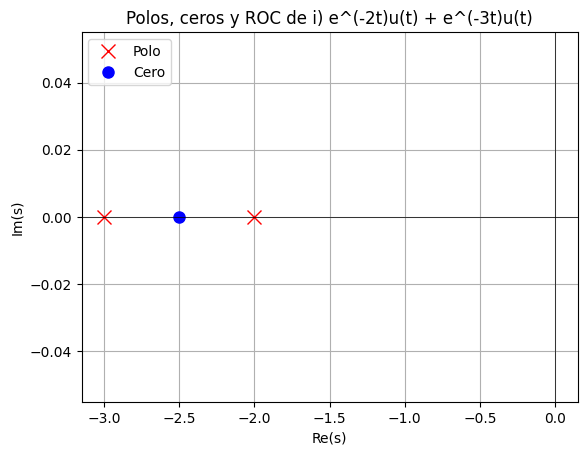


 ii) e^(2t)u(t) + e^(-3t)u(-t)
Transformada simplificada:
       5       
───────────────
(s - 2)⋅(s + 3)
Polos: [-3, 2]
Ceros: []
ROC: No existe ROC común (bidireccional no convergente)


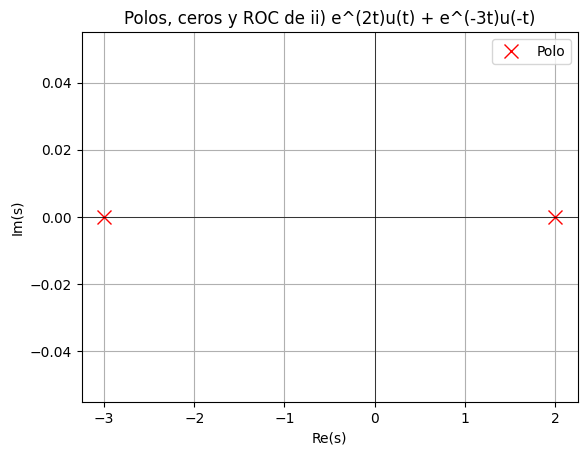


 iii) e^(-a|t|), con a = 1
Transformada simplificada:
 -2   
──────
 2    
s  - 1
Polos: [-1, 1]
Ceros: []
ROC: (-a < Re(s) < a) → con a=1: -1 < Re(s) < 1


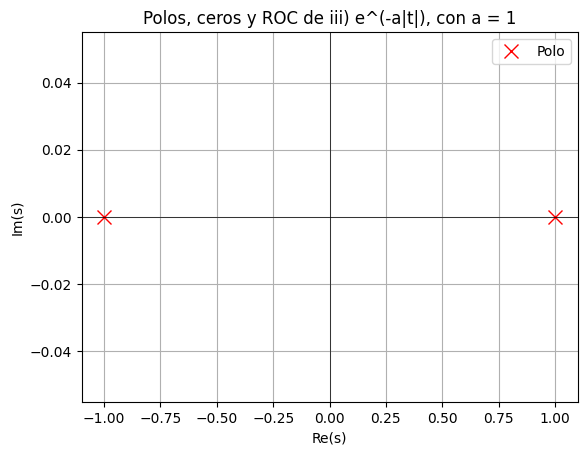


 iv) e^(-2t)[u(t) - u(t - 5)]
Transformada simplificada:
   -5⋅s - 10        
  ℯ              1  
- ────────── + ─────
    s + 2      s + 2
Polos: []
Ceros: []
ROC: Todo el plano (señal de duración finita)


/tmp/ipython-input-22-3399656645.py:64: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  ax.legend()


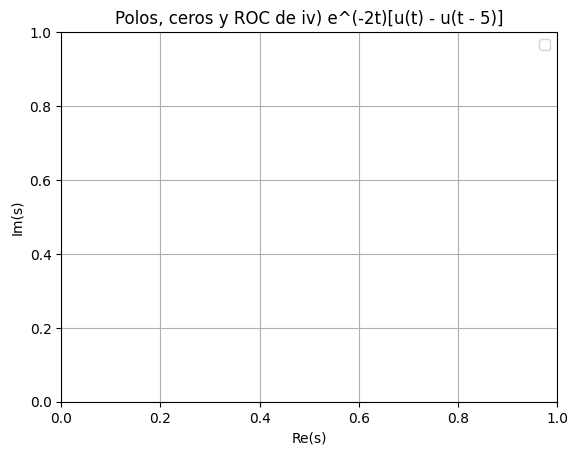

In [22]:
# Graficar polos, ceros y mostrar la Región de Convergencia (ROC) en Python (Colab)
import sympy as sp
#import matplotlib.pyplot as plt

sp.init_printing()

# Variables simbólicas
s, a = sp.symbols('s a', real=True)

# Transformadas de Laplace de cada señal
casos = {
    "i) e^(-2t)u(t) + e^(-3t)u(t)": {
        "X(s)": (1 / (s + 2)) + (1 / (s + 3)),
        "ROC": "Re(s) > -2 (ambas son causales)"
    },
    "ii) e^(2t)u(t) + e^(-3t)u(-t)": {
        "X(s)": (1 / (s - 2)) - (1 / (s + 3)),
        "ROC": "No existe ROC común (bidireccional no convergente)"
    },
    "iii) e^(-a|t|), con a = 1": {
        "X(s)": (1 / (s + a)) - (1 / (s - a)),  # luego se sustituye a=1
        "ROC": "(-a < Re(s) < a) → con a=1: -1 < Re(s) < 1"
    },
    "iv) e^(-2t)[u(t) - u(t - 5)]": {
        "X(s)": (1 - sp.exp(-5*(s + 2))) / (s + 2),
        "ROC": "Todo el plano (señal de duración finita)"
    }
}

# Función para graficar polos, ceros y mostrar ROC
def graficar_caso(nombre, Xs, roc):
    print(f"\n============================")
    print(f" {nombre}")

    # Sustituir 'a' si es necesario
    Xs_eval = Xs.subs(a, 1)

    # Simplificar y obtener polos y ceros
    Xs_simpl = sp.simplify(Xs_eval)
    num = sp.numer(Xs_simpl)
    den = sp.denom(Xs_simpl)
    ceros = sp.solve(num, s)
    polos = sp.solve(den, s)

    # Mostrar info simbólica
    print("Transformada simplificada:")
    sp.pprint(Xs_simpl)
    print("Polos:", polos)
    print("Ceros:", ceros)
    print(f"ROC: {roc}")

    # Graficar plano complejo
    fig, ax = plt.subplots()
    for p in polos:
        ax.plot(sp.re(p.evalf()), sp.im(p.evalf()), 'rx', markersize=10, label='Polo' if 'Polo' not in ax.get_legend_handles_labels()[1] else "")
    for z in ceros:
        ax.plot(sp.re(z.evalf()), sp.im(z.evalf()), 'bo', markersize=8, label='Cero' if 'Cero' not in ax.get_legend_handles_labels()[1] else "")
    ax.axhline(0, color='black', linewidth=0.5)
    ax.axvline(0, color='black', linewidth=0.5)
    ax.set_title(f"Polos, ceros y ROC de {nombre}")
    ax.set_xlabel("Re(s)")
    ax.set_ylabel("Im(s)")
    ax.grid(True)
    ax.legend()
    plt.show()

# Ejecutar para todos los casos
for nombre, datos in casos.items():
    graficar_caso(nombre, datos["X(s)"], datos["ROC"])


#12

# Función de Transferencia en Lazo Abierto

## Introducción

Se pide encontrar la **función de transferencia en lazo abierto** para los siguientes casos:

1. **Circuito RLC serie**  
   - Entrada: Tensión de alimentación $ V_{in}(t) $  
   - Salida: Tensión en el capacitor $ V_C(t) $

2. **Circuito RLC paralelo**  
   - Entrada: Corriente de alimentación $ I_{in}(t) $  
   - Salida: Corriente en el inductor $ I_L(t) $

Se asume que las condiciones iniciales son **nulas**, como es habitual al calcular funciones de transferencia en sistemas LTI.

---

## Caso 1: Circuito RLC Serie

### Elementos:
- Resistencia \( R \)
- Inductancia \( L \)
- Capacitancia \( C \)

Todos en **serie**.

### Ley de voltajes de Kirchhoff (KVL):
$
V_{in}(t) = V_R(t) + V_L(t) + V_C(t)
$

Aplicando transformada de Laplace con condiciones iniciales nulas:

$
V_{in}(s) = R I(s) + Ls I(s) + \frac{1}{sC} I(s)
$

Factorizando:

$
V_{in}(s) = I(s)\left( R + Ls + \frac{1}{sC} \right)
$

La salida es la tensión en el capacitor:
$
V_C(s) = \frac{1}{sC} I(s)
$

### Función de transferencia $ H(s) = \frac{V_C(s)}{V_{in}(s)} $:

$
H(s) = \frac{\frac{1}{sC} I(s)}{I(s)\left( R + Ls + \frac{1}{sC} \right)} = \frac{1}{sC \left( R + Ls + \frac{1}{sC} \right)}
$

Multiplicando numerador y denominador por \( sC \):

$
H(s) = \frac{1}{LC s^2 + RC s + 1}
$

---

## Caso 2: Circuito RLC Paralelo

### Elementos:
- Resistencia \( R \)
- Inductancia \( L \)
- Capacitancia \( C \)

Todos en **paralelo**.

### Ley de corrientes de Kirchhoff (KCL):
$
I_{in}(t) = I_R(t) + I_L(t) + I_C(t)
$

Aplicando Laplace:

- $ I_R(s) = \frac{V(s)}{R} $
- $ I_L(s) = \frac{V(s)}{Ls} $
- $ I_C(s) = CsV(s) $

Entonces:

$
I_{in}(s) = V(s)\left( \frac{1}{R} + \frac{1}{Ls} + Cs \right)
$

La salida es:

$
I_L(s) = \frac{V(s)}{Ls}
$

###  Función de transferencia $ H(s) = \frac{I_L(s)}{I_{in}(s)} $:

$
H(s) = \frac{\frac{V(s)}{Ls}}{V(s)\left( \frac{1}{R} + \frac{1}{Ls} + Cs \right)} = \frac{1}{Ls\left( \frac{1}{R} + \frac{1}{Ls} + Cs \right)}
$

Multiplicamos numerador y denominador por \( Ls \):

$
H(s) = \frac{1}{LCs^2 + \frac{L}{R}s + 1}
$

---

## Conclusión

| Circuito         | Entrada         | Salida         | Función de Transferencia $ H(s) $                                     |
|------------------|------------------|------------------|-------------------------------------------------------------------------|
| RLC serie        | $ V_{in}(t) $  | $ V_C(t) $     | $ \displaystyle \frac{1}{LCs^2 + RCs + 1} $                           |
| RLC paralelo     | $I_{in}(t)  $ | $ I_L(t) $     | $ \displaystyle \frac{1}{LCs^2 + \frac{L}{R}s + 1}  $                 |


#13

# Funciones de Transferencia en Lazo Cerrado y Respuesta Temporal

A partir de las funciones de transferencia en **lazo abierto** obtenidas previamente, se pide encontrar la **respuesta en el tiempo** para una configuración **en lazo cerrado** (retroalimentación unitaria), considerando las siguientes entradas:

- i) Impulso: $ \delta(t)  ⇒ X(s) = 1 $
- ii) Escalón unitario: $ u(t)  ⇒  X(s) = \frac{1}{s} $
- iii) Rampa: $ t \cdot u(t)  ⇒  X(s) = \frac{1}{s^2} $

---

## 1. RLC Serie — Salida: Tensión en el capacitor

### Función de transferencia en lazo abierto:
$
H_{ab}^{(1)}(s) = \frac{1}{LCs^2 + RCs + 1}
$

###  Función de transferencia en lazo cerrado (retroalimentación unitaria):
$
H_{c}^{(1)}(s) = \frac{H_{ab}^{(1)}(s)}{1 + H_{ab}^{(1)}(s)} = \frac{1}{LCs^2 + RCs + 2}
$

### Respuestas a las entradas:

**i) Impulso:**
$
Y(s) = H_c^{(1)}(s) \cdot 1 = \frac{1}{LCs^2 + RCs + 2}
$

**ii) Escalón unitario:**
$
Y(s) = \frac{1}{s} \cdot \frac{1}{LCs^2 + RCs + 2}
$

**iii) Rampa:**
$
Y(s) = \frac{1}{s^2} \cdot \frac{1}{LCs^2 + RCs + 2}
$

---

## 2. RLC Paralelo — Salida: Corriente en el inductor

###  Función de transferencia en lazo abierto:
$
H_{ab}^{(2)}(s) = \frac{1}{LCs^2 + \frac{L}{R}s + 1}
$

###  Función de transferencia en lazo cerrado:
$
H_c^{(2)}(s) = \frac{H_{ab}^{(2)}(s)}{1 + H_{ab}^{(2)}(s)} = \frac{1}{LCs^2 + \frac{L}{R}s + 2}
$

### Respuestas a las entradas:

**i) Impulso:**
$
Y(s) = H_c^{(2)}(s) \cdot 1 = \frac{1}{LCs^2 + \frac{L}{R}s + 2}
$

**ii) Escalón unitario:**
$
Y(s) = \frac{1}{s} \cdot \frac{1}{LCs^2 + \frac{L}{R}s + 2}
$

**iii) Rampa:**
$
Y(s) = \frac{1}{s^2} \cdot \frac{1}{LCs^2 + \frac{L}{R}s + 2}
$

---

## Conclusión

Las expresiones obtenidas son válidas en el dominio de Laplace.  
Para obtener las respuestas en el tiempo \( y(t) \), basta con aplicar la transformada inversa de Laplace a cada expresión.




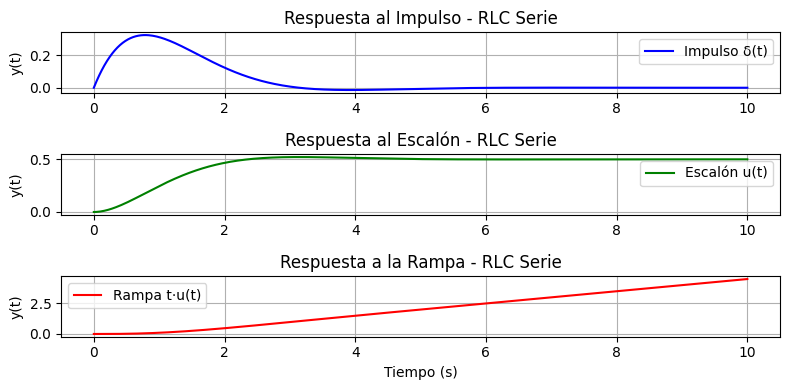

In [26]:
#RLC serie
#import sympy as sp
#import numpy as np
#import matplotlib.pyplot as plt

# Variables simbólicas
s, t = sp.symbols('s t', real=True)
R, L, C = sp.symbols('R L C', positive=True)

# Función de transferencia en lazo cerrado del RLC serie
Hc1_s = 1 / (L*C*s**2 + R*C*s + 2)

# Entradas en Laplace
X_impulso = 1
X_escalon = 1/s
X_rampa = 1/s**2

# Salidas en Laplace
Y_impulso = Hc1_s * X_impulso
Y_escalon = Hc1_s * X_escalon
Y_rampa = Hc1_s * X_rampa

# Sustituir valores: L=1 H, C=1 F, R=2 Ω
subs = {L:1, C:1, R:2}
Y_impulso = Y_impulso.subs(subs)
Y_escalon = Y_escalon.subs(subs)
Y_rampa = Y_rampa.subs(subs)

# Transformada inversa
y_impulso = sp.inverse_laplace_transform(Y_impulso, s, t)
y_escalon = sp.inverse_laplace_transform(Y_escalon, s, t)
y_rampa = sp.inverse_laplace_transform(Y_rampa, s, t)

# Convertir a funciones numéricas
f_impulso = sp.lambdify(t, y_impulso, 'numpy')
f_escalon = sp.lambdify(t, y_escalon, 'numpy')
f_rampa = sp.lambdify(t, y_rampa, 'numpy')

# Tiempo de simulación
T = np.linspace(0, 10, 500)

# Gráficas
plt.figure(figsize=(8, 4))

plt.subplot(3, 1, 1)
plt.plot(T, f_impulso(T), label='Impulso δ(t)', color='blue')
plt.title('Respuesta al Impulso - RLC Serie')
plt.grid(True)
plt.ylabel('y(t)')
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(T, f_escalon(T), label='Escalón u(t)', color='green')
plt.title('Respuesta al Escalón - RLC Serie')
plt.grid(True)
plt.ylabel('y(t)')
plt.legend()

plt.subplot(3, 1, 3)
plt.plot(T, f_rampa(T), label='Rampa t·u(t)', color='red')
plt.title('Respuesta a la Rampa - RLC Serie')
plt.xlabel('Tiempo (s)')
plt.ylabel('y(t)')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()


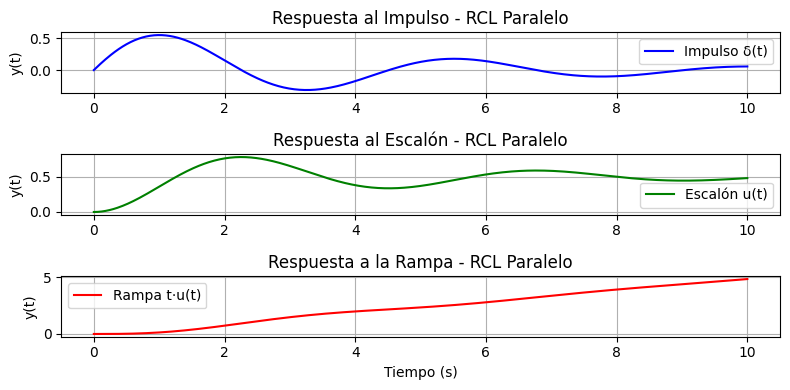

In [28]:
#RCL paralelo
#import sympy as sp
#import numpy as np
#import matplotlib.pyplot as plt

# Variables simbólicas
s, t = sp.symbols('s t', real=True)
R, L, C = sp.symbols('R L C', positive=True)

# Función de transferencia en lazo cerrado para RCL paralelo
# H(s) = 1 / (LC*s^2 + (L/R)*s + 2)
Hc_parallel = 1 / (L*C*s**2 + (L/R)*s + 2)

# Entradas en Laplace
X_impulso = 1
X_escalon = 1/s
X_rampa = 1/s**2

# Sustituir valores simbólicos
params = {L:1, C:1, R:2}
Y_impulso = (Hc_parallel * X_impulso).subs(params)
Y_escalon = (Hc_parallel * X_escalon).subs(params)
Y_rampa = (Hc_parallel * X_rampa).subs(params)

# Transformada inversa
y_impulso = sp.inverse_laplace_transform(Y_impulso, s, t)
y_escalon = sp.inverse_laplace_transform(Y_escalon, s, t)
y_rampa = sp.inverse_laplace_transform(Y_rampa, s, t)

# Convertir a funciones numéricas
f_impulso = sp.lambdify(t, y_impulso, 'numpy')
f_escalon = sp.lambdify(t, y_escalon, 'numpy')
f_rampa = sp.lambdify(t, y_rampa, 'numpy')

# Tiempo de simulación
T = np.linspace(0, 10, 500)

# Graficar
plt.figure(figsize=(8, 4))

plt.subplot(3, 1, 1)
plt.plot(T, f_impulso(T), label='Impulso δ(t)', color='blue')
plt.title('Respuesta al Impulso - RCL Paralelo')
plt.grid(True)
plt.ylabel('y(t)')
plt.legend()

plt.subplot(3, 1, 2)
plt.plot(T, f_escalon(T), label='Escalón u(t)', color='green')
plt.title('Respuesta al Escalón - RCL Paralelo')
plt.grid(True)
plt.ylabel('y(t)')
plt.legend()

plt.subplot(3, 1, 3)
plt.plot(T, f_rampa(T), label='Rampa t·u(t)', color='red')
plt.title('Respuesta a la Rampa - RCL Paralelo')
plt.xlabel('Tiempo (s)')
plt.ylabel('y(t)')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()
